In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from nnpde2diff1d import NNPDE2DIFF1D
from pde2diff1d import PDE2DIFF1D

In [2]:
%%javascript
MathJax.Hub.Config({
      TeX: { equationNumbers: { autoNumber: "AMS" } }
    });MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

## The problem

### Create the training data.

In [3]:
nx = 10
nt = 11
xt = np.linspace(0, 1, nx)
tt = np.linspace(0, 1, nt)
x_train = np.array(list(zip(np.tile(xt, nt), np.repeat(tt, nx))))

### Read the differential equation.

In [4]:
eq_name = 'diff1d_0'
eq = PDE2DIFF1D(eq_name)

### Compute the analytical solution.

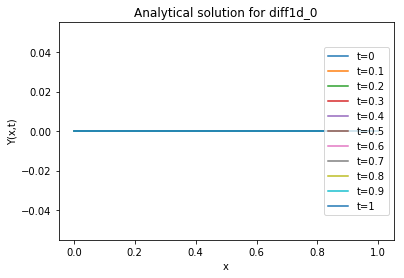

In [5]:
n = nx*nt
Ya = np.zeros(n)
for i in range(n):
    Ya[i] = eq.Yaf(x_train[i])
Ya = Ya.reshape((nt, nx))
for i in range(nt):
    plt.plot(xt, Ya[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Y(x,t)')
plt.legend(loc='right')
plt.title('Analytical solution for %s' % eq_name);

## Nelder-Mead (adaptive)

In [6]:
net1 = NNPDE2DIFF1D(eq)
trainalg = 'Nelder-Mead'
options = {}
options['adaptive'] = True
options['disp'] = True
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net1.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net1.res)

1min 58s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
 final_simplex: (array([[ 0.10353308,  0.46292504,  0.19993023, ...,  0.1667596 ,
        -0.19225001,  0.34077734],
       [ 0.10350301,  0.46373579,  0.19996643, ...,  0.16724193,
        -0.19300094,  0.34104702],
       [ 0.10350574,  0.46364984,  0.19991498, ...,  0.16711229,
        -0.19281214,  0.34078269],
       ...,
       [ 0.10346228,  0.46341563,  0.19998715, ...,  0.16728072,
        -0.19257007,  0.34075196],
       [ 0.10351309,  0.46309485,  0.19995528, ...,  0.16728924,
        -0.19306565,  0.34048651],
       [ 0.10351691,  0.46287756,  0.19998994, ...,  0.16710377,
        -0.19248924,  0.34019903]]), array([3.98815229e-05, 3.99550085e-05, 3.99757477e-05, 3.99948750e-05,
       3.99956662e-05, 3.99999983e-05, 4.00019632e-05, 4.00034156e-05,
       4.00235992e-05, 4.00254231e-05, 4.00296453e-05, 4.00319965e-05,
       4.00357986e-05, 4.00431390e-05, 4.00446382e-05, 4.00471978e-05,
       4.00526658e-

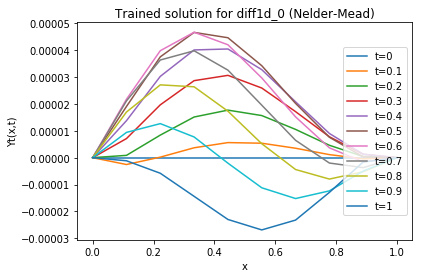

In [7]:
Yt1 = net1.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s)' % (eq_name, trainalg));

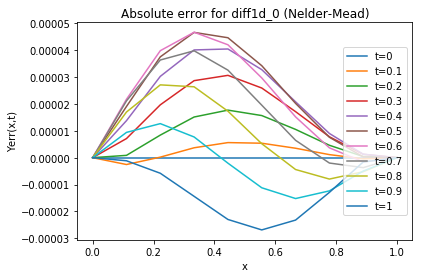

In [8]:
Y_err1 = Yt1 - Ya
for i in range(nt):
    plt.plot(xt, Y_err1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s)' % (eq_name, trainalg));

## Nelder-Mead (adaptive, maxfev=16000)

In [9]:
net2 = NNPDE2DIFF1D(eq)
trainalg = 'Nelder-Mead'
options = {}
options['adaptive'] = True
options['disp'] = True
options['maxfev'] = 16000
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net2.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net2.res)

4min 10s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
 final_simplex: (array([[ 0.10810597,  0.46115884,  0.17607508, ...,  0.07281764,
        -0.10141309,  0.36891967],
       [ 0.10815774,  0.46078244,  0.17596155, ...,  0.07210738,
        -0.10056841,  0.36895909],
       [ 0.10814245,  0.46108646,  0.17602459, ...,  0.07247293,
        -0.10099585,  0.36901336],
       ...,
       [ 0.10815525,  0.46108454,  0.1761857 , ...,  0.07277065,
        -0.10148992,  0.36906124],
       [ 0.108168  ,  0.4614113 ,  0.17614241, ...,  0.07272505,
        -0.10146628,  0.36918018],
       [ 0.10815368,  0.46143243,  0.17619873, ...,  0.07292054,
        -0.10150752,  0.36924686]]), array([8.43501327e-06, 8.43967517e-06, 8.44116599e-06, 8.44518194e-06,
       8.44589519e-06, 8.44743837e-06, 8.44954659e-06, 8.45154242e-06,
       8.45327598e-06, 8.45353079e-06, 8.45464309e-06, 8.45490755e-06,
       8.45643616e-06, 8.45653928e-06, 8.45744541e-06, 8.45774685e-06,
       8.45775502e-

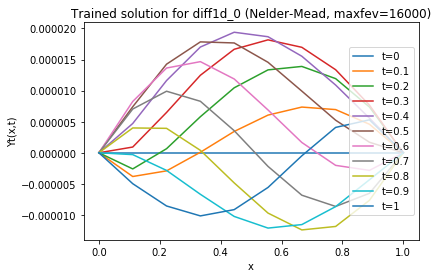

In [10]:
Yt2 = net2.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

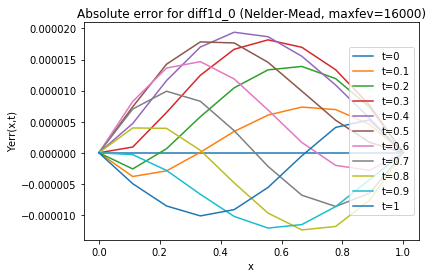

In [11]:
Y_err2 = Yt2 - Ya
for i in range(nt):
    plt.plot(xt, Y_err2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

## Nelder-Mead (adaptive, maxfev=32000)

In [12]:
net3 = NNPDE2DIFF1D(eq)
trainalg = 'Nelder-Mead'
options = {}
options['adaptive'] = True
options['disp'] = True
options['maxfev'] = 32000
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net3.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net3.res)

8min 30s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
 final_simplex: (array([[ 0.0543237 ,  0.34151031,  0.11941902, ...,  0.08268307,
        -0.00643012, -0.01571109],
       [ 0.05438454,  0.34143374,  0.11944926, ...,  0.08266077,
        -0.00647946, -0.01504507],
       [ 0.05435323,  0.34159249,  0.11943469, ...,  0.08270398,
        -0.00644163, -0.01567598],
       ...,
       [ 0.05447905,  0.34199923,  0.119526  , ...,  0.08264407,
        -0.00650135, -0.01514253],
       [ 0.05441991,  0.34188231,  0.11949993, ...,  0.08266908,
        -0.00646158, -0.01553355],
       [ 0.05445013,  0.34203622,  0.11951396, ...,  0.08269594,
        -0.00648567, -0.01544254]]), array([1.75703806e-08, 1.75850277e-08, 1.75969791e-08, 1.75997249e-08,
       1.76010470e-08, 1.76048681e-08, 1.76231834e-08, 1.76309262e-08,
       1.76454650e-08, 1.76472949e-08, 1.76487950e-08, 1.76496585e-08,
       1.76596822e-08, 1.76713049e-08, 1.76750711e-08, 1.76773873e-08,
       1.76794581e-

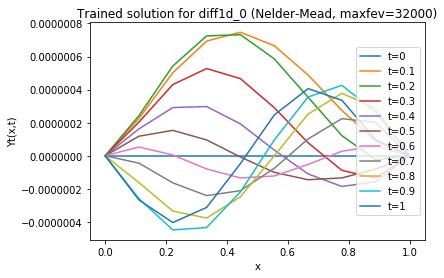

In [13]:
Yt3 = net3.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

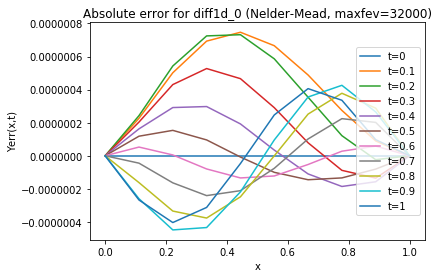

In [14]:
Y_err3 = Yt3 - Ya
for i in range(nt):
    plt.plot(xt, Y_err3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

## Nelder-Mead (adaptive, maxfev=64000)

In [15]:
net4 = NNPDE2DIFF1D(eq)
trainalg = 'Nelder-Mead'
options = {}
options['adaptive'] = True
options['disp'] = True
options['maxfev'] = 64000
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net4.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net4.res)

15min 45s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
 final_simplex: (array([[ 0.03677867,  0.32842101,  0.13886399, ...,  0.07449028,
        -0.0045784 , -0.01686588],
       [ 0.03675318,  0.32840627,  0.13889571, ...,  0.07446452,
        -0.00457249, -0.01684925],
       [ 0.03677042,  0.32843253,  0.1388875 , ...,  0.07447598,
        -0.00457748, -0.0168565 ],
       ...,
       [ 0.03690611,  0.32835812,  0.13872962, ...,  0.0745507 ,
        -0.0045808 , -0.01669988],
       [ 0.03685292,  0.32835656,  0.13878565, ...,  0.07451817,
        -0.00456845, -0.01675553],
       [ 0.03689524,  0.32835318,  0.13873869, ...,  0.07454832,
        -0.00457654, -0.01671593]]), array([1.91399914e-09, 1.91593675e-09, 1.91651051e-09, 1.91756775e-09,
       1.91784048e-09, 1.91842396e-09, 1.91868986e-09, 1.91879936e-09,
       1.92026064e-09, 1.92041624e-09, 1.92216827e-09, 1.92443355e-09,
       1.92467043e-09, 1.92467938e-09, 1.92672130e-09, 1.92716330e-09,
       1.92851641e

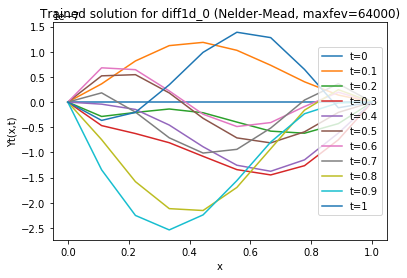

In [16]:
Yt4 = net4.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt4[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

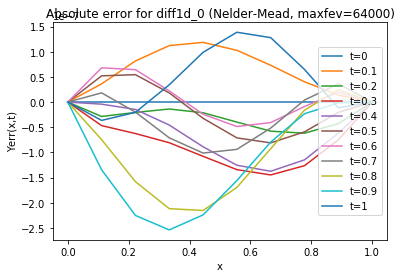

In [17]:
Y_err4 = Yt4 - Ya
for i in range(nt):
    plt.plot(xt, Y_err4[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

## Nelder-Mead (adaptive, maxfev=128000)

In [18]:
net5 = NNPDE2DIFF1D(eq)
trainalg = 'Nelder-Mead'
options = {}
options['adaptive'] = True
options['disp'] = True
options['maxfev'] = 128000
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net5.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net5.res)

31min 39s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
 final_simplex: (array([[ 0.01460303,  0.28101019,  0.16392809, ...,  0.06239996,
        -0.00047056, -0.03880296],
       [ 0.01460571,  0.281038  ,  0.1639377 , ...,  0.06240289,
        -0.00046878, -0.03879385],
       [ 0.01464159,  0.28111681,  0.16386919, ...,  0.0624335 ,
        -0.00047536, -0.03875161],
       ...,
       [ 0.01468384,  0.28119617,  0.16378612, ...,  0.06246922,
        -0.00048406, -0.03872592],
       [ 0.01460039,  0.28100834,  0.16393588, ...,  0.06240335,
        -0.00047173, -0.03880473],
       [ 0.01462158,  0.28107843,  0.16386487, ...,  0.06242613,
        -0.00046904, -0.03877252]]), array([2.66244394e-10, 2.66254498e-10, 2.66399718e-10, 2.66453397e-10,
       2.66485822e-10, 2.66508900e-10, 2.66516106e-10, 2.66542232e-10,
       2.66586003e-10, 2.66587590e-10, 2.66590064e-10, 2.66611859e-10,
       2.66615610e-10, 2.66685826e-10, 2.66723325e-10, 2.66739182e-10,
       2.66743016e

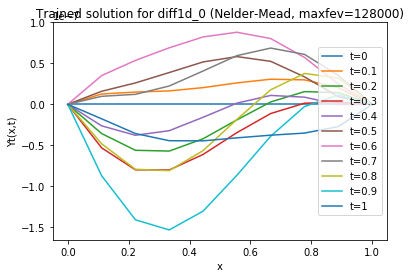

In [19]:
Yt5 = net5.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt5[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

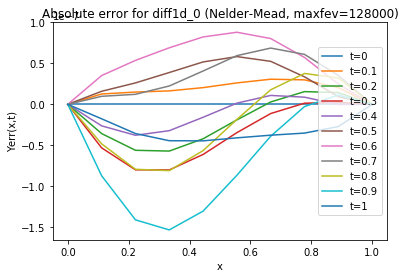

In [20]:
Y_err5 = Yt5 - Ya
for i in range(nt):
    plt.plot(xt, Y_err5[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

## Nelder-Mead (adaptive, maxfev=256000)

In [21]:
net6 = NNPDE2DIFF1D(eq)
trainalg = 'Nelder-Mead'
options = {}
options['adaptive'] = True
options['disp'] = True
options['maxfev'] = 256000
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net6.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net6.res)

1h 2min 31s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
 final_simplex: (array([[ 0.02407354,  0.15862254,  0.19169752, ...,  0.0367119 ,
        -0.02982446, -0.03828518],
       [ 0.02408488,  0.15859748,  0.19166767, ...,  0.03671596,
        -0.02984275, -0.03827291],
       [ 0.02409498,  0.15857838,  0.19167917, ...,  0.03672024,
        -0.02986098, -0.03826517],
       ...,
       [ 0.02407078,  0.15867614,  0.19168058, ...,  0.03668826,
        -0.02982124, -0.03829767],
       [ 0.02408229,  0.15866873,  0.19166958, ...,  0.03668863,
        -0.02983598, -0.03828918],
       [ 0.02408692,  0.15861125,  0.19166031, ...,  0.03670909,
        -0.02984622, -0.0382738 ]]), array([3.84679480e-11, 3.84863380e-11, 3.84910964e-11, 3.84966344e-11,
       3.85207315e-11, 3.85302629e-11, 3.85313836e-11, 3.85339158e-11,
       3.85388799e-11, 3.85409880e-11, 3.85488327e-11, 3.85521785e-11,
       3.85550115e-11, 3.85575690e-11, 3.85589949e-11, 3.85637510e-11,
       3.8567794

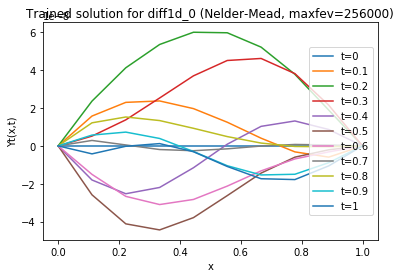

In [22]:
Yt6 = net6.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt6[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

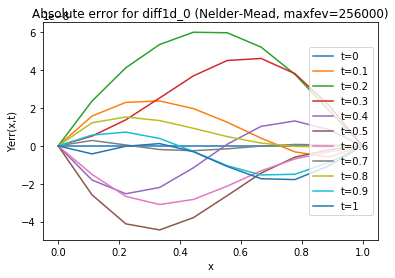

In [23]:
Y_err6 = Yt6 - Ya
for i in range(nt):
    plt.plot(xt, Y_err6[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));